# A Review of [WILDS: A Benchmark of in-the-Wild Distribution Shifts](https://arxiv.org/pdf/2012.07421.pdf)

# The framework for final deliverables

## Problem statement

> What is the problem the paper aims to solve?

The paper observes the fact that distribution shifts occur in real-world datasets, and the authors aim to provide a set of example datasets against which algorithms can be evaluated for the purpose of improving performance when distribution shifts are present. The two types of distribution shifts the authors focus on in this paper are: domain generalization, where the test data is related but distinct from the train data, and subpopulation shift, where the test data is from a specific subpopulation that's present but underrepresented in the train data.

## Context/scope

> Why is this problem important or interesting?

Distribution shifts are ubiquitous in real-world applications, but ML research mostly focuses on contrived, cleanly-defined datasets. The the authors worry that the messiness of real-world data is a blind spot in academic research and therefore algorithms and methods must be re-evaluated in the lens of real-world data. The datasets the authors chose are specifically curated to maximize realism and diversity of application areas and characteristics.

## Existing work

> What has been done in literature?

The authors point to several examples of older, smaller datasets that have been used in the past but have fallen out of favor since modern models need more training data to be effective:

1. part-ofspeech tagging (Marcus et al., 1993)
2. sentiment analysis (Blitzer et al., 2007)
3. land cover classification (Bruzzone and Marconcini, 2009)
4. object recognition (Saenko et al., 2010)
5. flow cytometry (Blanchard et al., 2011)

They also give examples of researchers applying synthetic transformations in order to simulate shifts:

1. ImageNet-C (Hendrycks and Dietterich, 2019), which corrupts images with noise
2. the Backgrounds Challenge (Xiao et al., 2020)
3. Waterbirds (Sagawa et al., 2020a), which alter image backgrounds
4. Colored MNIST (Arjovsky et al., 2019), which changes the 6 colors of MNIST digits

Similarly, there are examples of using intentional data splits, or a combination of different, related datasets:

1. generalizing to photos solely from cartoons and other stylized images in PACS (Li et al., 2017a)
2. generalizing to objects at different scales solely from a single scale in DeepFashion Remixed (Hendrycks et al., 2020b)
3. Using training and test sets with disjoint subclasses in BREEDS (Santurkar et al., 2020)
4. Using similar datasets (Hendrycks and Dietterich, 2019)

## Contribution

> What is gap in literature that the paper is trying to fill? What is the unique contribution?

All of the above-listed examples are good testbeds for isolated experimentation, but in the WILDS paper the authors aim to evaluate whether algorithms proposed in these other papers are generally robust or simply robust to the specific testing conditions they were developed against.

## Technical content (high level)

> What are the high level ideas behind their technical contribution?

In this paper the authors apply the proposed "robust" algorithms to real-world datasets and compare their performance to a baseline of Empirical Risk Minimization to evaluate their effectiveness at minimizing the known distribution shifts' effects.

## Technical content (details)
> Highlight (not copy and paste entire sections) the relevant details that are important to focus on (e.g. if there's a model, define it; if there is a theorem, state it and explain why it's important, etc).

## Experiments
> Which types of experiments were performed? What claims were these experiments trying to prove? Did the results prove the claims?

## Evaluation (your opinion)
> Do you think the work is technically sound? Do you think the proposed model/inference method is practical to use on real data and tasks? Do you think the experimental section was strong (there are sufficient evidence to support the claims and eliminate confounding factors)?

## Future work (for those interested in continuing research in a related field)
> Do you think you can suggest a concrete change or modification that would improve the existing solution(s) to the problem of interest? Try to implement some of these changes/modifications.

## Broader Impact
> How does this work potentially impact (both positively and negatively) the broader machine learning community and society at large when this technology is deployed? In the applications of this technology, who are the potentially human stakeholders? What are the potential risks to the interest of these stakeholders in the failure modes of this technology? Is there potential to exploit this technology for malicious purposes?

## Code
* At least one clear working pedagogical example demonstrating the problem the paper is claiming to solve. 
* At lease a bare bones implementation of the model/algorithm/solution (in some cases, you may be able to make assumptions  to simplify the model/algorithm/solution with the approval of your instructor)
* Demonstration on at least one instance that your implementation solves the problem.
* Demonstration on at least one instance the failure mode of the model/algorithm/solution, with an explanation for why failure occurred (is the dataset too large? Did you choose a bad hyper parameter?). The point of this is to point out edge cases to the user.

**NOTE**: Look at https://github.com/onefishy/am207_fall19_projects/blob/master/calibrated_uncertainty/calibrated_uncertainty_2/report.ipynb for inspiration regarding how they weaved code into the above sections.

In [ ]:
# Basic NN
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='linear', input_shape=(2,)))
model.add(layers.Dense(1, activation='linear'))
model.summary()

[]

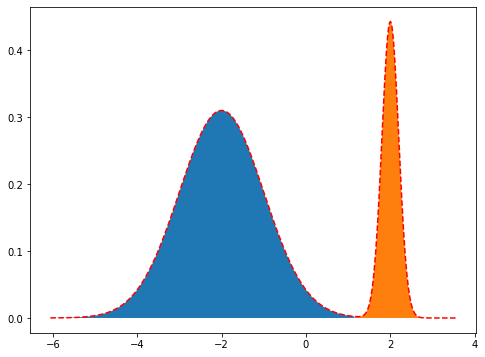

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)

x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
X_train = x_eval[:375]
X_test = x_eval[375:]

bimodal_pdf = (norm.pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size
               + norm.pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")
ax.fill_between(X_train, bimodal_pdf[:375])
ax.fill_between(X_test, bimodal_pdf[375:])

ax.plot()


In [ ]:
# ERM on Scatterplot


In [ ]:
# DRO on Scatterplot


In [ ]:
# ERM on dSprites


In [ ]:
# DRO on dSprites
